In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split

def create_dataset():
    # Dataset parameters
    num_samples = 8000
    num_features = 320
    num_classes = 4
    num_samples_per_class = num_samples // num_classes

    # Generate dataset using make_multilabel_classification
    X, y = make_multilabel_classification(
        n_samples=num_samples,
        n_features=num_features,
        n_classes=num_classes,
        random_state=42
    )

    # Inject noise into labels
    noise_fraction = 0.1
    num_noisy_labels = int(noise_fraction * num_samples)
    noisy_label_indices = np.random.choice(num_samples, num_noisy_labels, replace=False)
    noisy_class_indices = np.random.choice(num_classes, num_noisy_labels, replace=True)
    y[noisy_label_indices, noisy_class_indices] = 1 - y[noisy_label_indices, noisy_class_indices]

    # Split into train and test sets
    test_fraction = 0.2
    num_test_samples = int(test_fraction * num_samples)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test_samples, random_state=42)

    return X_train, y_train, X_test, y_test

train_dataset, train_labels, test_dataset, test_labels = create_dataset()

In [3]:
train_labels

array([[1, 1, 1, 1],
       [1, 1, 0, 0],
       [1, 1, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 1, 1]])

In [4]:
train_dataset

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

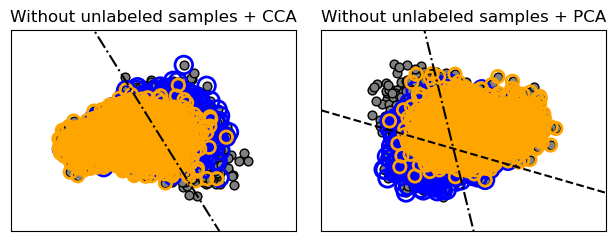

In [24]:
# Authors: Vlad Niculae, Mathieu Blondel
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cross_decomposition import CCA
from sklearn.datasets import make_multilabel_classification
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC


def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel="linear"))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c="gray", edgecolors=(0, 0, 0))
    plt.scatter(
        X[zero_class, 0],
        X[zero_class, 1],
        s=160,
        edgecolors="b",
        facecolors="none",
        linewidths=2,
        label="Class 1",
    )
    plt.scatter(
        X[one_class, 0],
        X[one_class, 1],
        s=80,
        edgecolors="orange",
        facecolors="none",
        linewidths=2,
        label="Class 2",
    )

    plot_hyperplane(
        classif.estimators_[0], min_x, max_x, "k--", "Boundary\nfor class 1"
    )
    plot_hyperplane(
        classif.estimators_[1], min_x, max_x, "k-.", "Boundary\nfor class 2"
    )
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - 0.5 * max_x, max_x + 0.5 * max_x)
    plt.ylim(min_y - 0.5 * max_y, max_y + 0.5 * max_y)
    if subplot == 2:
        plt.xlabel("First principal component")
        plt.ylabel("Second principal component")
        plt.legend(loc="upper left")

plot_subfigure(train_dataset,train_labels, 3, "Without unlabeled samples + CCA", "cca")
plot_subfigure(train_dataset, train_labels, 4, "Without unlabeled samples + PCA", "pca")

plt.subplots_adjust(0.04, 0.02, 0.97, 0.94, 0.09, 0.2)
plt.show()

In [40]:
def make_labels_to_semi_supervised_task(labels, percentage):
    # Set semi supervised labels to zero
    semi_supervised_labels = np.zeros_like(labels)
    semi_supervised_labels[:int(labels.shape[0] * percentage)] = labels[:int(labels.shape[0] * percentage)]

    return semi_supervised_labels

In [41]:
semi_supervised_labels = make_labels_to_semi_supervised_task(train_labels, 0.3)

In [5]:
abstract_text_multilabel_dataset = pd.read_csv("train.csv")

In [6]:
abstract_text_multilabel_dataset

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
20967,20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0
20968,20969,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0
20969,20970,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0
20970,20971,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0


In [19]:
available_labels = abstract_text_multilabel_dataset.index.unique()
desired_labels = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']

# Check if the desired labels are present in the available labels
missing_labels = [label for label in desired_labels if label not in available_labels]

if missing_labels:
    print(f"The following labels are missing in the dataset: {missing_labels}")
else:
    # Retrieve the desired labels from the dataset
    abstract_text_multilabel_dataset_labels = abstract_text_multilabel_dataset.loc[desired_labels]
    abstract_text_multilabel_dataset.drop(desired_labels, inplace=True)
    # Continue with the rest of your code

The following labels are missing in the dataset: ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']


In [20]:
abstract_text_multilabel_dataset.drop(desired_labels, axis=1,inplace=True)
abstract_text_multilabel_dataset.drop(["ID"], axis=1, inplace=True)

In [21]:
abstract_text_multilabel_dataset

,TITLE,ABSTRACT
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...
4,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...
...,...,...
20967,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...
20968,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...
20969,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...
20970,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...


In [22]:
import torch
from transformers import BertTokenizer, BertModel

In [23]:
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)
def preprocess_text(text):
    # Tokenize the text
    tokens = tokenizer.encode(text, add_special_tokens=True)

    # Convert tokens to tensors
    input_ids = torch.tensor(tokens).unsqueeze(0)

    # Generate BERT embeddings
    with torch.no_grad():
        outputs = model(input_ids)
        embeddings = outputs[0].squeeze(0)

    return embeddings

100%|██████████| 440473133/440473133 [1:45:32<00:00, 69562.65B/s]  
